In [90]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

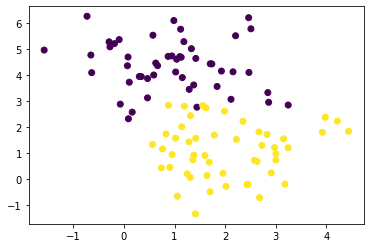

In [91]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0 )

#Transpose y in order t get a vector
y = y.reshape((y.shape[0],1))

plt.scatter(X[:,0],X[:,1],c=y)
plt.plot

### Initialize the weight vector W and the biais b

In [92]:
def initialisation(X):
    b = np.random.randn(1)
    W = np.random.randn(X.shape[1],1)
    return (W,b)

In [93]:
W,b=initialisation(X)

### Define the model: output z and activation function sigma

In [94]:
def model(X,W,b):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A

In [95]:
A = model(X,W,b)

### Log Loss function

In [96]:
def log_loss(A,y):
    m = len(y)
    L = (-1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    return L


In [97]:
log_loss(A,y)

1.6647539015847397

### Gradients

In [98]:
def gradients(A,X,y):
    dW = (1/len(y))*np.dot(X.T,A-y)
    db = (1/len(y))*np.sum(A-y)
    return (dW,db)

In [99]:
dW,db = gradients(A,X,y)

### Update W

In [100]:
def update(dW,db,W,b,learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W,b)

In [101]:
### USE a predition for futur data

def predict(X,W,b):
    A = model(X,W,b)
    return A>=0.5

### Artificial Neuron

In [102]:
def artificial_neuron(X,y,learning_rate=0.1,n_iter=100):
    W,b = initialisation(X)
    i = 0
    Loss=[]
    while i<n_iter:
        A = model(X,W,b)
        Loss.append(log_loss(A,y))
        dW,db = gradients(A,X,y)
        W,b = update(dW,db,W,b,learning_rate)
        i+=1
    
    #y_predict est une liste de True/False donc de binaires donc on peut soustraire par y qui est une liste de 0 et 1
    y_predic = predict(X,W,b)
    print(accuracy_score(y,y_predic))
   
    plt.plot(Loss)
    plt.show() 
    return (W,b)

0.9


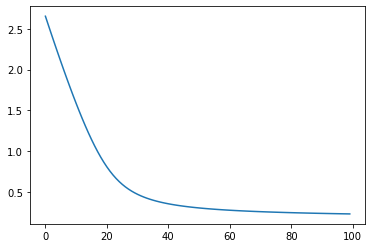

In [103]:
#à la fin de l'entrainement, on recupere W et b 
(W,b) = artificial_neuron(X,y,learning_rate=0.1,n_iter=100)

[ True]


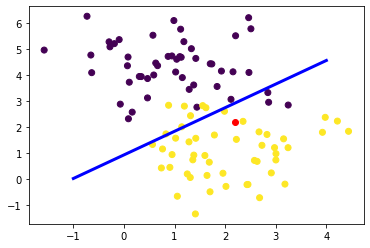

In [104]:
## essayer notre algo sur une nouvelle donnée 
new_plant = np.array([2.2,2.2])

x0 = np.linspace(-1,4,100)
x1 = (-W[0]*x0-b)/W[1]

plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.plot(x0,x1,c='b',lw=3)
plt.show

print(predict(new_plant,W,b))

### Tracer la frontière de décision 

In [105]:
## la frontiere correspond a z(X)=0

x1.shape

(100,)

In [106]:
1+1

2